In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import OneHotEncoder

# Dataset

In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploration

In [14]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

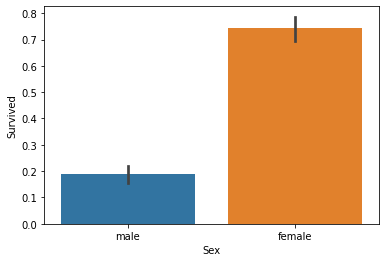

In [23]:
sns.barplot(data = train, x = "Sex", y = "Survived")

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

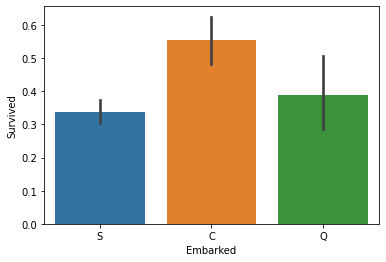

In [24]:
sns.barplot(data = train, x = "Embarked", y = "Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

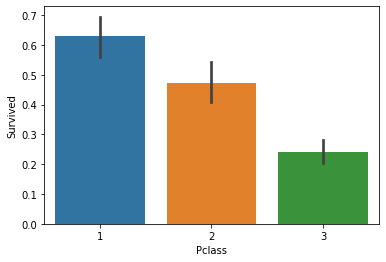

In [25]:
sns.barplot(data = train, x = "Pclass", y = "Survived")

# Pre-processing

In [52]:
impute_value = train["Age"].median()
train["Age"] = train["Age"].fillna(impute_value)
test["Age"] = train["Age"].fillna(impute_value)

train["IsFemale"] = (train["Sex"] == "female").astype(int)
test["IsFemale"] = (test["Sex"] == "female").astype(int)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

# Model

In [6]:
predictors = ["Pclass", "IsFemale", "Fare", "Embarked"]

x_train = train[predictors].values
y_train = train["Survived"].values

x_test = test[predictors].values

In [7]:
model = LogisticRegressionCV(cv = 10).fit(x_train, y_train)

# Predictions

In [8]:
y_predict = model.predict(x_test)
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [9]:
predictions = pd.DataFrame(test, columns = ["PassengerId"])
predictions["Survived"] = y_predict

In [10]:
predictions.to_csv("titanic_submission.csv", index = False)